<a href="https://colab.research.google.com/github/sylpx/Deep-Learning-Tugas-2/blob/main/Tugas%20Deep%20Learning%20Agniel%20Lorensyus%20Malino%20(HyperParameter).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1. Install dan import library
!pip install gdown --quiet
!pip install tensorflow --quiet

import tensorflow as tf
import gdown
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
import matplotlib.pyplot as plt

In [4]:
# 2. Upload dataset zip
file_id = "13OMC0kC0ibt-cqm1wfpchuV5LZUFHZAO"
url = f"https://drive.google.com/uc?export=download&id={file_id}"

gdown.download(url, "DATASETGAMBAR.zip", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=13OMC0kC0ibt-cqm1wfpchuV5LZUFHZAO
From (redirected): https://drive.google.com/uc?export=download&id=13OMC0kC0ibt-cqm1wfpchuV5LZUFHZAO&confirm=t&uuid=6163a1d8-0b1b-42af-8929-d1895cd859b4
To: /content/DATASETGAMBAR.zip
100%|██████████| 38.8M/38.8M [00:00<00:00, 150MB/s]


'DATASETGAMBAR.zip'

In [5]:
# 3. Ekstrak dataset
import zipfile

with zipfile.ZipFile("DATASETGAMBAR.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

In [6]:
import shutil
import random
from pathlib import Path

# Path awal dataset setelah diekstrak
original_dataset_dir = Path("dataset/DATASET GAMBAR (resize)")

# Tujuan folder baru
base_dir = Path("dataset/split_dataset")
train_dir = base_dir / "train"
val_dir = base_dir / "val"
test_dir = base_dir / "test"

# Buat folder train, val, dan test
for folder in [train_dir, val_dir, test_dir]:
    folder.mkdir(parents=True, exist_ok=True)

# Rasio split
val_split = 0.2  # 20% untuk validasi
test_split = 0.1 # 10% untuk testing

# Untuk setiap kelas
for class_dir in original_dataset_dir.iterdir():
    if class_dir.is_dir():
        images = list(class_dir.glob("*"))
        random.shuffle(images)

        class_name = class_dir.name

        # Hitung jumlah data
        total = len(images)
        val_count = int(total * val_split)
        test_count = int(total * test_split)
        train_count = total - val_count - test_count

        # Bagi dataset
        train_images = images[:train_count]
        val_images = images[train_count:train_count+val_count]
        test_images = images[train_count+val_count:]

        # Buat subfolder kelas di masing-masing folder tujuan
        for subset, subset_images in zip(
            [train_dir, val_dir, test_dir],
            [train_images, val_images, test_images]
        ):
            class_subset_dir = subset / class_name
            class_subset_dir.mkdir(parents=True, exist_ok=True)
            for img in subset_images:
                shutil.copy(img, class_subset_dir)


In [7]:
# 4. Definisikan path dataset
data_dir = "dataset/split_dataset"
img_width, img_height = 224, 224  # Ukuran yang lebih umum untuk CNN
batch_size = 32

In [8]:
from sklearn.model_selection import train_test_split
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tentukan proporsi split
train_ratio = 0.6  # 60% untuk training
val_ratio = 0.2  # 20% untuk validation
test_ratio = 0.2  # 20% untuk testing

# Direktori data
data_dir = 'dataset'
split_dataset_dir = os.path.join(data_dir, 'split_dataset')

train_dir = os.path.join(split_dataset_dir, 'train')
val_dir = os.path.join(split_dataset_dir, 'val')
test_dir = os.path.join(split_dataset_dir, 'test')

# Membuat direktori jika belum ada
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Daftar kelas di dalam dataset Anda (misalnya, berdasarkan nama folder)
class_names = os.listdir(train_dir)  # Mengambil kelas dari folder 'train'

# Bagi data per kelas
for class_name in class_names:
    # Path ke folder gambar kelas di dalam 'train', 'val', dan 'test'
    class_train_path = os.path.join(train_dir, class_name)
    class_val_path = os.path.join(val_dir, class_name)
    class_test_path = os.path.join(test_dir, class_name)

    # Ambil file gambar dari folder kelas di 'train', 'val', dan 'test'
    train_files = [f for f in os.listdir(class_train_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    val_files = [f for f in os.listdir(class_val_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    test_files = [f for f in os.listdir(class_test_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Debugging: Periksa apakah ada gambar dalam folder kelas
    print(f"Jumlah gambar di kelas {class_name}:")
    print(f"Train: {len(train_files)}, Val: {len(val_files)}, Test: {len(test_files)}")

    if len(train_files) == 0 or len(val_files) == 0 or len(test_files) == 0:
        print(f"Warning: Salah satu folder kosong di kelas {class_name}. Melewati kelas {class_name}.")
        continue  # Lewati kelas ini jika ada folder yang kosong

    # Pindahkan file ke folder yang sesuai
    for file in train_files:
        shutil.move(os.path.join(class_train_path, file), os.path.join(train_dir, class_name, file))
    for file in val_files:
        shutil.move(os.path.join(class_val_path, file), os.path.join(val_dir, class_name, file))
    for file in test_files:
        shutil.move(os.path.join(class_test_path, file), os.path.join(test_dir, class_name, file))

# Preprocessing dan augmentasi data training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Preprocessing data validasi dan test (tanpa augmentasi)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Membaca data dan menghasilkan batch untuk training, validation, dan testing
train_generator = train_datagen.flow_from_directory(
    'dataset/split_dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'dataset/split_dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(split_dataset_dir, 'test'),
    target_size=(img_height, img_width),  # Sesuaikan dengan ukuran gambar yang Anda inginkan
    batch_size=batch_size,  # Sesuaikan dengan ukuran batch yang Anda inginkan
    class_mode='categorical',
    shuffle=False  # Data test tidak diacak
)


Jumlah gambar di kelas Fanta:
Train: 210, Val: 60, Test: 30
Jumlah gambar di kelas Cap Panda:
Train: 210, Val: 60, Test: 30
Jumlah gambar di kelas Susu Beruang:
Train: 210, Val: 60, Test: 30
Jumlah gambar di kelas Sprite:
Train: 210, Val: 60, Test: 30
Found 840 images belonging to 4 classes.
Found 240 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [9]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Hitung class weights
class_weights = compute_class_weight('balanced',
                                   classes=np.unique(train_generator.classes),
                                   y=train_generator.classes)
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

Class Weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0)}


In [10]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import ResNet50

# Gunakan ResNet50 sebagai model dasar (base_model)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Set base model untuk tidak dilatih (freeze)
base_model.trainable = False

# Bangun model
model = Sequential([
    base_model,  # ResNet50 sebagai base model

    # Tambahkan lapisan-lapisan tambahan untuk klasifikasi
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Output layer dengan 4 kelas
])

# Ringkasan model
model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,279,108 (187.98 MB)

 Trainable params: 25,691,396 (98.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [11]:
# 7. Kompilasi model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0001),  # LR lebih kecil
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# 8. Training model dengan EarlyStopping dan ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True),
    ModelCheckpoint("best_model.keras", monitor='val_accuracy', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks,
    class_weight=class_weights  # ini tetap karena kamu sudah handle imbalance
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 48s 989ms/step - accuracy: 0.2623 - loss: 6.3670 - val_accuracy: 0.3750 - val_loss: 3.0043 - learning_rate: 1.0000e-04
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 531ms/step - accuracy: 0.3980 - loss: 2.6559 - val_accuracy: 0.5417 - val_loss: 1.7976 - learning_rate: 1.0000e-04
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 529ms/step - accuracy: 0.4076 - loss: 1.7468 - val_accuracy: 0.5500 - val_loss: 1.4342 - learning_rate: 1.0000e-04
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 442ms/step - accuracy: 0.4265 - loss: 1.4903 - val_accuracy: 0.4625 - val_loss: 1.3680 - learning_rate: 1.0000e-04
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 439ms/step - accuracy: 0.4429 - loss: 1.4419 - val_accuracy: 0.5208 - val_loss: 1.2998 - learning_rate: 1.0000e-04
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 560ms/step - accuracy: 0.4561 - loss: 1.3646 - val_accuracy: 0.5542 - val_loss: 1.2408 - learning_rate: 1.0000e-04
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 443ms/step - acc

In [13]:
print('Jumlah total gambar dalam training set:', train_generator.samples)
print('Jumlah total gambar dalam validation set:', val_generator.samples)

Jumlah total gambar dalam training set: 840
Jumlah total gambar dalam validation set: 240


In [14]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6785 - loss: 0.8826
Test Accuracy: 72.50%


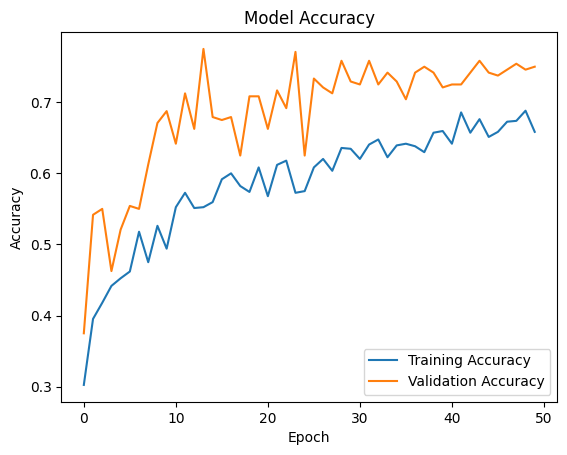

In [15]:
# 9. Visualisasi akurasi dan loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step


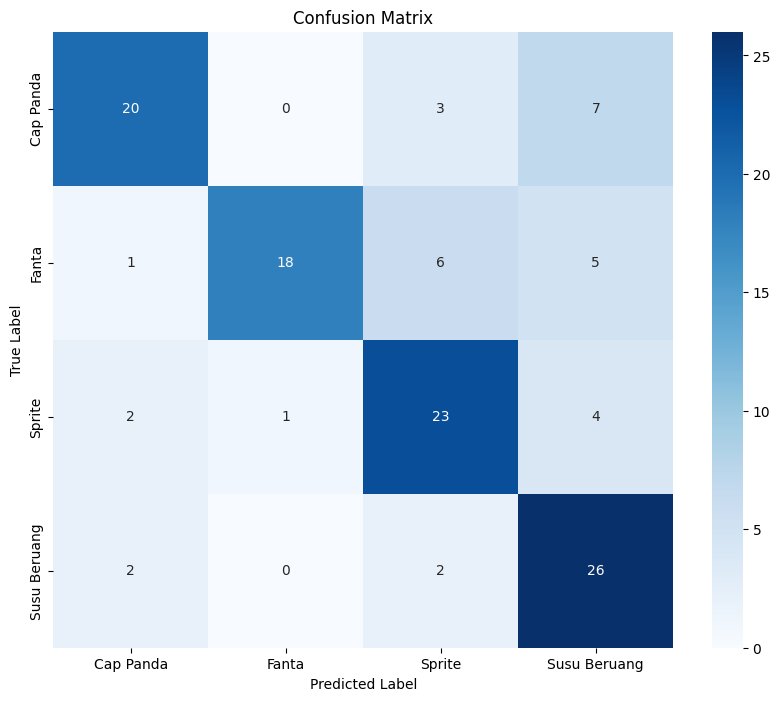


Classification Report:
              precision    recall  f1-score   support

   Cap Panda       0.80      0.67      0.73        30
       Fanta       0.95      0.60      0.73        30
      Sprite       0.68      0.77      0.72        30
Susu Beruang       0.62      0.87      0.72        30

    accuracy                           0.72       120
   macro avg       0.76      0.72      0.73       120
weighted avg       0.76      0.72      0.73       120



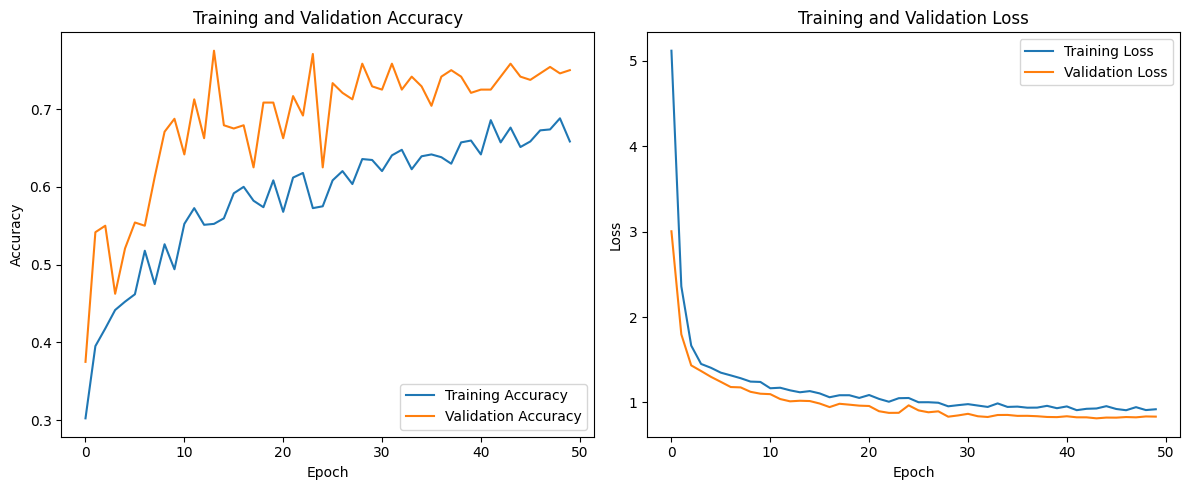

In [16]:
# Evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Prediksi pada data test
test_generator.reset()
predictions = model.predict(test_generator, steps=len(test_generator))
predicted_classes = np.argmax(predictions, axis=1)

# Dapatkan true classes
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Buat confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print('\nClassification Report:')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Grafik akurasi dan loss yang lebih lengkap
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
# 10. Simpan model
model.save("model_klasifikasi_4kelas.h5")
print("Model saved!")


Model saved!
